# Build Models for Separating Spam vs. Ham
__ToDos__
* Visuals? TSNE (only for visuals, not for modeling)
* Build function for modelling
* Model, Grid Search
* Build function for accuracy testing
* PCA then Model and Grid Search
* Build Visuals (trees)
* Build App (prediction and feature importance)

__Questions for Damien__
* Suggestion for final product
* Discuss choice of Precision and Accuracy, Visuals

__Models__
* KNN
* Logistics Regression
* SVM (Linear, Poly, Normal)
* Trees / Forest
* Naive Bayes (promising, applying Bernoulli, Binom, Normal)
* Accuracy Measures: Accuracy, ROC AUC, Precision, Recall, Specificity



In [5]:
# Basics
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
import os
import pickle


import pandas as pd
import numpy as np
import math

# Models
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

# CV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

# Plots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.2)
plt.style.use('fivethirtyeight')
# from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D

In [6]:
os.chdir('/Users/bellepeng/Desktop/Metis/Work/Projects/P3_Spam')
df=pickle.load(open('df_all.pkl', 'rb'))

In [7]:
def Eval(y, pred):
    mat=confusion_matrix(y, pred)
    print("Accuracy: ",  f'{accuracy_score(y_test, prediction):4.2%}')
    print("Precision: ", f'{precision_score(y_test, prediction):4.2%}')
    print("Recall: ", f'{recall_score(y_test, prediction):4.2%}')
    print("ROC AUC: ", f'{roc_auc_score(y_test, prediction):4.2%}')
    print('False Negative Rate:', f'{ (mat[1][0]/(mat[0][0]+mat[1][0])):4.2%}')
    print('False Positve Rate:', f'{ (mat[0][1]/(mat[1][1]+mat[0][1])): 4.2%}')

    return pd.DataFrame(mat, columns=['Pred NOT Spam', 'Pred Spam'], 
                        index=['Actual NOT Spam', 'Actual Spam'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size = 0.2, random_state=42)

## Baseline  
Accuracy:  86.44%  
Precision:  86.53%  
Recall:  76.26%   
ROC AUC:  84.48%  
False Negative Rate: 13.60%  
False Positve Rate:  13.47%

In [95]:
lm1 = LogisticRegression(C=10)
lm1.fit(X_train, y_train)
prediction = lm1.predict(X_test)
Eval(y_test, prediction)

Accuracy:  86.44%
Precision:  86.53%
Recall:  76.26%
ROC AUC:  84.48%
False Negative Rate: 13.60%
False Positve Rate:  13.47%


,Pred NOT Spam,Pred Spam
Actual NOT Spam,775,61
Actual Spam,122,392


## Scale and Feature Engineer

In [9]:
# Log all my features determined in the EDA notebook
def log_var(x):
    if x==0 or x=="nan": return 0
    else: return np.log(x)

In [10]:
for i in range(len(X_train.columns)):
    X_train[X_train.columns[i]]=[log_var(x) for x in X_train[X_train.columns[i]]]

for i in range(len(X_test.columns)):
    X_test[X_test.columns[i]]=[log_var(x) for x in X_test[X_test.columns[i]]]

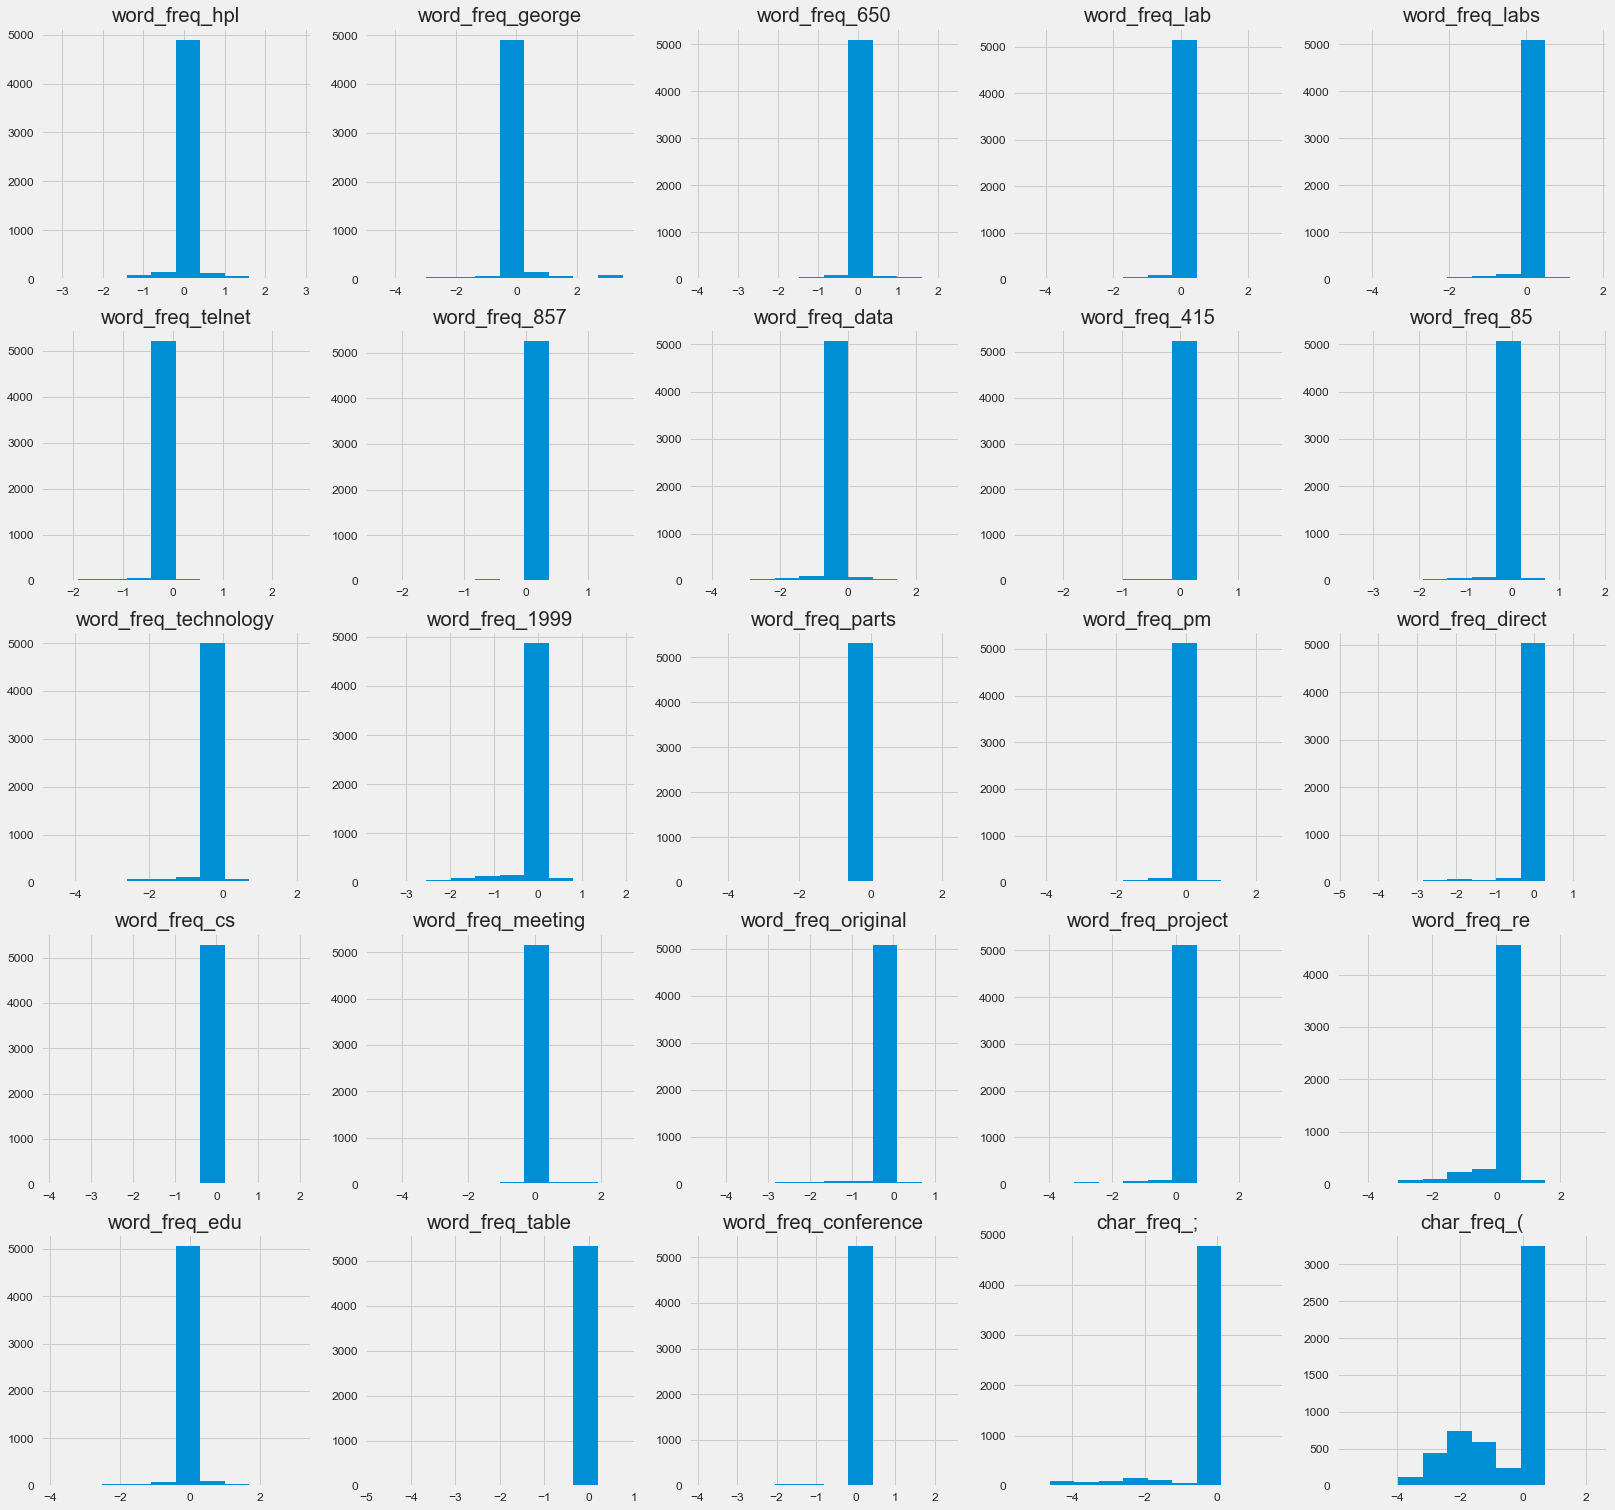

In [98]:
# Increment k for every 25, highest is 32
f, ax = plt.subplots(nrows=5, ncols=5, sharex=False, sharey=False, figsize=(25,25))
k=25
for i in range(0,5):
    for j in range(0,5):
        ax[i,j].set_title(X_train.columns[(i*5+j+k)])
        ax[i,j].hist(X_train.iloc[:, (i*5+j+k)])

In [11]:
from sklearn.preprocessing import StandardScaler
ssX = StandardScaler()
X_train_scaled=ssX.fit_transform(X_train)
X_test_scaled=ssX.transform(X_test)

## Modelling

In [99]:
models = {}
parameters = {}

models['KNN'] = KNeighborsClassifier()
models['Logistics Regression'] = LogisticRegression()
models['SVM - Linear'] = SVC(kernel='linear')
models['LinearSVC'] = LinearSVC()
models['SVM - Polynomial'] = SVC(kernel='poly')
models['SVM - RBF'] = SVC(kernel='rbf')
models['Naive Bayes - Gaussian'] = GaussianNB()
# models['Naive Bayes - Multinomial'] = MultinomialNB() # Requires non-neg input?
models['Naive Bayes - Bernoulli'] = BernoulliNB()
models['Tree'] = DecisionTreeClassifier()
models['Random Forest'] = RandomForestClassifier()

In [100]:
# Best of Accuracy was Random Forest at 91.5%.
for name,model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, scoring='accuracy', n_jobs=1)
    print('Model: '+name)
    print("Score: " + str(np.mean(scores)))
    print()



Model: KNN
Score: 0.8671266427718041

Model: Logistics Regression
Score: 0.8163498537469617

Model: SVM - Linear
Score: 0.819684835001854

Model: LinearSVC
Score: 0.8163490297861822

Model: SVM - Polynomial
Score: 0.7472222222222222

Model: SVM - RBF
Score: 0.8660180035430313

Model: Naive Bayes - Gaussian
Score: 0.774120627858114

Model: Naive Bayes - Bernoulli
Score: 0.7911457174638487

Model: Tree
Score: 0.8826929098174928

Model: Random Forest
Score: 0.9140124830058088



In [42]:
# Best of Precision is RF 90.6%
for name,model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, scoring='precision', n_jobs=1)
    print('Model: '+name)
    print("Score: " + str(np.mean(scores)))
    print()

Model: KNN
Score: 0.8464590910186734

Model: Logistics Regression
Score: 0.7995432474409565

Model: SVM - Linear
Score: 0.8159774939110535

Model: LinearSVC
Score: 0.808539450986784

Model: SVM - Polynomial
Score: 0.8745262672587416

Model: SVM - RBF
Score: 0.8941970147979325

Model: Naive Bayes - Gaussian
Score: 0.6818945766338516

Model: Naive Bayes - Bernoulli
Score: 0.7401922280875389

Model: Tree
Score: 0.8303168444519627

Model: Random Forest
Score: 0.9059579281531979



__Parameter Tuning__

In [12]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer, hamming_loss
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.svm import SVC

In [123]:
# Tree Train score: 0.8726834692364714, Test score: 0.857037037037037
tree = DecisionTreeClassifier()
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(1,9)),
    'min_samples_leaf': list(range(1,10,2))
}
grid = GridSearchCV(tree, param_grid=params, cv=10)
grid.fit(X_train_scaled, y_train)
print("Train score:", grid.best_score_)
print("Test score:", grid.best_estimator_.score(X_test_scaled, y_test))
grid.best_estimator_

Train score: 0.8726834692364714
Test score: 0.857037037037037


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
list(range(1,9))

[1, 2, 3, 4, 5, 6, 7, 8]

In [133]:
# Random Forest Train score: 0.8726834692364714, Test score: 0.857037037037037
rf = RandomForestClassifier()
params = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': list(range(200,500,50)),
    'max_depth': list(range(1,9)),
    'min_samples_leaf': list(range(1,10,2)),
}
grid = GridSearchCV(rf, param_grid=params, cv=10)
grid.fit(X_train_scaled, y_train)
print("Train score:", grid.best_score_)
print("Test score:", grid.best_estimator_.score(X_test_scaled, y_test))
grid.best_estimator_

Train score: 0.8917716827279466
Test score: 0.8896296296296297


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=350, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Train score: 0.8917716827279466  
Test score: 0.8896296296296297  
RandomForestClassifier(bootstrap=True, class_weight=None, __criterion='gini'__,  
            __max_depth=8__, max_features='auto', max_leaf_nodes=None,  
            min_impurity_decrease=0.0, min_impurity_split=None,  
            __min_samples_leaf=1__, min_samples_split=2,  
            min_weight_fraction_leaf=0.0, __n_estimators=350__, n_jobs=1,  
            oob_score=False, random_state=None, verbose=0,  
            warm_start=False)

In [ ]:
# Naive Bayes - Multi
NB_Multi= MultinomialNB()
params = {
    'alpha': list(range()) 
    'fit_prior': True, 
    'class_prior': None
}
grid = GridSearchCV(NB_Multi, param_grid=params, cv=10)
grid.fit(X_train, y_train)
print("Train score:", grid.best_score_)
print("Test score:", grid.best_estimator_.score(X_test, y_test))
grid.best_estimator_
# also tyr unlogging the features then re-run

In [ ]:
# Naive Bayes - Gaussian
NB_G= GaussianNB()
params = {'priors': }
grid = GridSearchCV(NB_G, param_grid=params, cv=10)
grid.fit(X_train_scaled, y_train)
print("Train score:", grid.best_score_)
print("Test score:", grid.best_estimator_.score(X_test_scaled, y_test))
grid.best_estimator_

In [ ]:
# Naive Bayes - Bernoulli
NB_Bern= BernoulliNB()
params = {
    'alpha': 1.0, 
    'binarize': 0.0, 
    'fit_prior': True, 
    'class_prior': None
}
grid = GridSearchCV(NB_Bern, param_grid=params, cv=10)
grid.fit(X_train_scaled, y_train)
print("Train score:", grid.best_score_)
print("Test score:", grid.best_estimator_.score(X_test_scaled, y_test))
grid.best_estimator_

In [131]:
# knn Train score: 0.8802816901408451   Test score: 0.8562962962962963
knn= KNeighborsClassifier()
params = { 'n_neighbors': list(range(1, 12)) }
grid = GridSearchCV(knn, param_grid=params, cv=10)
grid.fit(X_train_scaled, y_train)
print("Train score:", grid.best_score_)
print("Test score:", grid.best_estimator_.score(X_test_scaled, y_test))
grid.best_estimator_

Train score: 0.8802816901408451
Test score: 0.8562962962962963


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [132]:
# Logistics Train score: 0.8209785025945144 Test score: 0.8125925925925926
logistics= LogisticRegression()
params = {
        'C': np.logspace(-3,6, 12),      
        'penalty': ['l1', 'l2']  
}
grid = GridSearchCV(logistics, param_grid=params, cv=10)
grid.fit(X_train_scaled, y_train)
print("Train score:", grid.best_score_)
print("Test score:", grid.best_estimator_.score(X_test_scaled, y_test))
grid.best_estimator_

Train score: 0.8209785025945144
Test score: 0.8125925925925926


LogisticRegression(C=1.873817422860385, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [ ]:
LinearSVC= LinearSVC()
params = {
        'penalty': ['l1', 'l2']  ,
        'loss': ['squared_hinge', 'hinge'] ,
        'C': np.logspace(-6,9, 10)
}
grid = GridSearchCV(LinearSVC, param_grid=params, cv=5)
grid.fit(X_train_scaled, y_train)
print("Train score:", grid.best_score_)
print("Test score:", grid.best_estimator_.score(X_test_scaled, y_test))
grid.best_estimator_

In [ ]:
svm= SVC()
params = {
        'kernel': ['rbf'],      
        'C': np.logspace(-5,7, 10),
        'gamma': np.logspace(-5,7, 10) 
}
grid = GridSearchCV(svm, param_grid=params, cv=5)
grid.fit(X_train_scaled, y_train)
print("Train score:", grid.best_score_)
print("Test score:", grid.best_estimator_.score(X_test_scaled, y_test))
grid.best_estimator_

In [13]:
svm= SVC()
params = {
        'kernel': ['poly'],      
        'C': np.logspace(-5,7, 10),
        'degree': np.linspace(2,9,8),  
}
grid = GridSearchCV(svm, param_grid=params, cv=3)
grid.fit(X_train_scaled, y_train)
print("Train score:", grid.best_score_)
print("Test score:", grid.best_estimator_.score(X_test_scaled, y_test))
grid.best_estimator_

Train score: 0.8574870274277242
Test score: 0.8592592592592593


SVC(C=46.41588833612773, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2.0, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Train score: 0.8574870274277242  
Test score: 0.8592592592592593  
SVC(C=46.41588833612773, cache_size=200, class_weight=None, coef0=0.0,  
  decision_function_shape='ovr', degree=2.0, gamma='auto', kernel='poly',  
  max_iter=-1, probability=False, random_state=None, shrinking=True,  
  tol=0.001, verbose=False)

In [ ]:
print("Accuracy: %.3f"% accuracy_score(Y_test, model.predict(X_test)))
print(classification_report(Y_test, model.predict(X_test)))

__Pipeline__

In [109]:
pipe = Pipeline([
    ('knn', KNeighborsClassifier()),
    ('logistics', LogisticRegression()),
    ('linearsvc', LinearSVC()),
    ('svm', SVC()),
    ('GaussianNB', GaussianNB()),
    ('MultinomialNB', MultinomialNB()),
    ('BernoulliNB', BernoulliNB()),
    ('tree', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier())
])

param_grid = [
    { # knn
        'n_neighbors': range(1, 12)      
    }
    ,
    { # logistics
        'logistics__C': np.logspace(-3,6, 12),      
        'logistics__penalty': ['l1', 'l2']  
    },
    { # linearsvc
        'linearsvc__penalty': ['l1', 'l2']  ,
        'linearsvc__loss': ['squared_hinge', 'hinge']
    },
    { # svm         
        'svm__kernel': ['linear'],
        'svm__C': np.logspace(-6,9, 10)
    },
    { # svm         
        'svm__kernel': ['poly'],
        'svm__C': np.logspace(-6,9, 10),
        'svm__degree': np.linspace(2,10,9),                
    },
        
    {
        'svm__kernel': ['rbf'],
        'svm__C': np.logspace(-6,9, 10),
        'svm__gamma': np.logspace(-6,9, 10)
    },
    { # GaussianNB 
    },
    { # MultinomialNB (use unscaled and unlogged data, try only unscaled but (logged data+1))
    },
    { # BernoulliNB (0, 1)
    },    
    {   
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    },     
    { 
        'n_estimators': [50, 100, 200],
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    }   
]

grid = GridSearchCV(pipe, cv=10, n_jobs=1, param_grid=param_grid)
# grid.fit(X_train, y_train)
# y_preds = grid.predict(X_test)
grid.best_estimator_.score(X_test_scaled, y_test)
# grids = {}
# for model_info, params in zip(pipe, param_grid):
#     name, model = model_info
#     grid = GridSearchCV(model(), params)
#     grid.fit(X_train_imputed_scaled, y_train)
#     s = f"{name}: best score: {grid.best_score_}"
#     print(s)
#     grids[name] = grid
    

ValueError: Parameter values for parameter (n_neighbors) need to be a sequence.

## Visualization

In [43]:
os.chdir('/Users/bellepeng/Desktop/Metis/Work/tools/tsne_python')
import tsne

In [72]:
from sklearn.manifold import TSNE
X_train_scaled_tsne = TSNE(n_components=2, perplexity=30).fit_transform(X_train_scaled[:500])

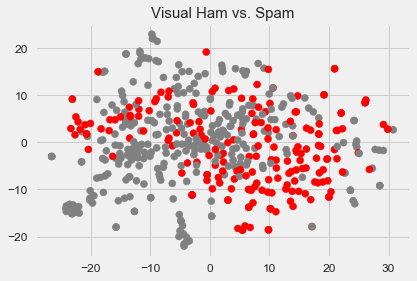

In [86]:
plt.title('Visual Ham vs. Spam', fontsize=15)
plt.scatter(X_train_scaled_tsne[:,0], X_train_scaled_tsne[:, 1], c=['grey' if cl == 0 else 'r' for cl in y_train.values])
plt.scatter(X_train_scaled_tsne[:,0], X_train_scaled_tsne[:, 1], c=['grey' if cl == 0 else 'r' for cl in y_train.values])
plt.legend(handles=['k--', 'k'], labels=['Ham', 'Spam'], loc='upper left')

In [ ]:
X_train_scaled_tsne=pd.DataFrame(X_train_scaled_tsne, columns=['Component1', 'Component2'])
X_scaled_tsne=pd.merge(X_train_scaled_tsne, pd.DataFrame(y_train), left_index=True, right_index=True)
X_scaled_tsne.head()

In [ ]:
colors = ['m','aqua']
label=['Ham', 'Spam']
plt.figure()
for class_label, color, label in zip([0,1], colors, label):
    plt.scatter(X_scaled_tsne.loc[X_scaled_tsne['spam'] == class_label, 'Component1'],
            X_scaled_tsne.loc[X_scaled_tsne['spam'] == class_label, 'Component2'],
            c=color, label=label, alpha=0.5)
plt.legend()